# Load Data


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
file_path = "newset.csv"  # Replace with your dataset path
data = pd.read_csv(file_path)

# Step 1: Inspect data
print("Data Head:\n", data.head())
print("\nData Info:\n")
data.info()
print("\nMissing Values:\n", data.isnull().sum())

Data Head:
    anon_ticket_number       issue_datetime state  anon_plate_id  division  \
0             8979623  2017-12-06 12:29:00    PA        4728925       NaN   
1             8979624  2017-10-16 18:03:00    PA        4728926       NaN   
2             8979625  2017-11-02 22:09:00    PA        4728926       NaN   
3             8979626  2017-11-05 20:19:00    PA        4728926       NaN   
4             8979627  2017-11-11 13:53:00    NJ        4728927       NaN   

          location       violation_desc  fine issuing_agency        lat  \
0  6053 CASTOR AVE        BUS ONLY ZONE    51            PPA  40.035503   
1  4300 CRESSON ST  STOPPING PROHIBITED    51            PPA  40.025712   
2  4300 CRESSON ST      OVER TIME LIMIT    26            PPA  40.025792   
3  4300 CRESSON ST      OVER TIME LIMIT    26            PPA  40.025898   
4    200 N 11TH ST     METER EXPIRED CC    36            PPA  39.956063   

         lon   gps  zip_code  
0 -75.081110  True   19149.0  
1 -75.222495

# Data cleaning

In [23]:
data_head = data.head()
data_info = data.info()
missing_values = data.isnull().sum()

data_head, data_info, missing_values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 872342 entries, 0 to 872341
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   anon_ticket_number  872342 non-null  int64  
 1   issue_datetime      872342 non-null  object 
 2   state               872341 non-null  object 
 3   anon_plate_id       872342 non-null  int64  
 4   division            109 non-null     float64
 5   location            872058 non-null  object 
 6   violation_desc      872342 non-null  object 
 7   fine                872342 non-null  int64  
 8   issuing_agency      872342 non-null  object 
 9   lat                 842152 non-null  float64
 10  lon                 842154 non-null  float64
 11  gps                 842152 non-null  object 
 12  zip_code            728987 non-null  float64
dtypes: float64(4), int64(3), object(6)
memory usage: 86.5+ MB


(   anon_ticket_number       issue_datetime state  anon_plate_id  division  \
 0             8979623  2017-12-06 12:29:00    PA        4728925       NaN   
 1             8979624  2017-10-16 18:03:00    PA        4728926       NaN   
 2             8979625  2017-11-02 22:09:00    PA        4728926       NaN   
 3             8979626  2017-11-05 20:19:00    PA        4728926       NaN   
 4             8979627  2017-11-11 13:53:00    NJ        4728927       NaN   
 
           location       violation_desc  fine issuing_agency        lat  \
 0  6053 CASTOR AVE        BUS ONLY ZONE    51            PPA  40.035503   
 1  4300 CRESSON ST  STOPPING PROHIBITED    51            PPA  40.025712   
 2  4300 CRESSON ST      OVER TIME LIMIT    26            PPA  40.025792   
 3  4300 CRESSON ST      OVER TIME LIMIT    26            PPA  40.025898   
 4    200 N 11TH ST     METER EXPIRED CC    36            PPA  39.956063   
 
          lon   gps  zip_code  
 0 -75.081110  True   19149.0  
 1 -75.2

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
file_path = "newset.csv"  # Replace with your dataset path
data = pd.read_csv(file_path)

# Step 1: Inspect data
print("Data Head:\n", data.head())
print("\nData Info:\n")
data.info()
print("\nMissing Values:\n", data.isnull().sum())

# Drop rows with missing critical features
critical_features = ['violation_desc', 'state', 'issue_datetime', 'lat', 'lon']
data_cleaned = data.dropna(subset=critical_features)

# Convert 'issue_datetime' to datetime and extract useful features
data_cleaned['issue_datetime'] = pd.to_datetime(data_cleaned['issue_datetime'], errors='coerce')
data_cleaned['issue_hour'] = data_cleaned['issue_datetime'].dt.hour  # Extract hour
data_cleaned['issue_day'] = data_cleaned['issue_datetime'].dt.dayofweek  # Extract day of the week (0 = Monday, 6 = Sunday)

# Drop rows with invalid datetime conversions
data_cleaned = data_cleaned.dropna(subset=['issue_datetime'])

# Remove violation descriptions less frequent than "EXPIRE TAG"
violation_counts = data_cleaned['violation_desc'].value_counts()
threshold = violation_counts['EXPIRED TAG'] if 'EXPIRED TAG' in violation_counts else 0
data_filtered = data_cleaned[data_cleaned['violation_desc'].isin(violation_counts[violation_counts >= threshold].index)]

# Recalculate correlation without `lat` and `lon`
numeric_features = ['fine', 'issue_hour']  # Excluding lat and lon
correlation_matrix_filtered = data_filtered[numeric_features].corr()

Data Head:
    anon_ticket_number       issue_datetime state  anon_plate_id  division  \
0             8979623  2017-12-06 12:29:00    PA        4728925       NaN   
1             8979624  2017-10-16 18:03:00    PA        4728926       NaN   
2             8979625  2017-11-02 22:09:00    PA        4728926       NaN   
3             8979626  2017-11-05 20:19:00    PA        4728926       NaN   
4             8979627  2017-11-11 13:53:00    NJ        4728927       NaN   

          location       violation_desc  fine issuing_agency        lat  \
0  6053 CASTOR AVE        BUS ONLY ZONE    51            PPA  40.035503   
1  4300 CRESSON ST  STOPPING PROHIBITED    51            PPA  40.025712   
2  4300 CRESSON ST      OVER TIME LIMIT    26            PPA  40.025792   
3  4300 CRESSON ST      OVER TIME LIMIT    26            PPA  40.025898   
4    200 N 11TH ST     METER EXPIRED CC    36            PPA  39.956063   

         lon   gps  zip_code  
0 -75.081110  True   19149.0  
1 -75.222495

/var/folders/tp/tl1z_f1545g5kt9cssf_36l80000gn/T/ipykernel_14880/3910235844.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['issue_datetime'] = pd.to_datetime(data_cleaned['issue_datetime'], errors='coerce')
/var/folders/tp/tl1z_f1545g5kt9cssf_36l80000gn/T/ipykernel_14880/3910235844.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['issue_hour'] = data_cleaned['issue_datetime'].dt.hour  # Extract hour
/var/folders/tp/tl1z_f1545g5kt9cssf_36l80000gn/T/ipykernel_14880/39102358

# PLots

Data Head:
    anon_ticket_number       issue_datetime state  anon_plate_id  division  \
0             8979623  2017-12-06 12:29:00    PA        4728925       NaN   
1             8979624  2017-10-16 18:03:00    PA        4728926       NaN   
2             8979625  2017-11-02 22:09:00    PA        4728926       NaN   
3             8979626  2017-11-05 20:19:00    PA        4728926       NaN   
4             8979627  2017-11-11 13:53:00    NJ        4728927       NaN   

          location       violation_desc  fine issuing_agency        lat  \
0  6053 CASTOR AVE        BUS ONLY ZONE    51            PPA  40.035503   
1  4300 CRESSON ST  STOPPING PROHIBITED    51            PPA  40.025712   
2  4300 CRESSON ST      OVER TIME LIMIT    26            PPA  40.025792   
3  4300 CRESSON ST      OVER TIME LIMIT    26            PPA  40.025898   
4    200 N 11TH ST     METER EXPIRED CC    36            PPA  39.956063   

         lon   gps  zip_code  
0 -75.081110  True   19149.0  
1 -75.222495

/var/folders/tp/tl1z_f1545g5kt9cssf_36l80000gn/T/ipykernel_14880/2603306926.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['issue_datetime'] = pd.to_datetime(data_cleaned['issue_datetime'], errors='coerce')
/var/folders/tp/tl1z_f1545g5kt9cssf_36l80000gn/T/ipykernel_14880/2603306926.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['issue_hour'] = data_cleaned['issue_datetime'].dt.hour  # Extract hour
/var/folders/tp/tl1z_f1545g5kt9cssf_36l80000gn/T/ipykernel_14880/26033069

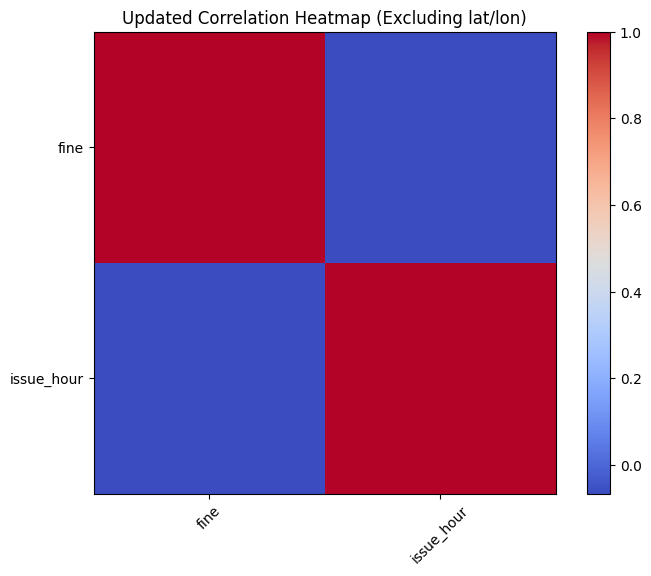

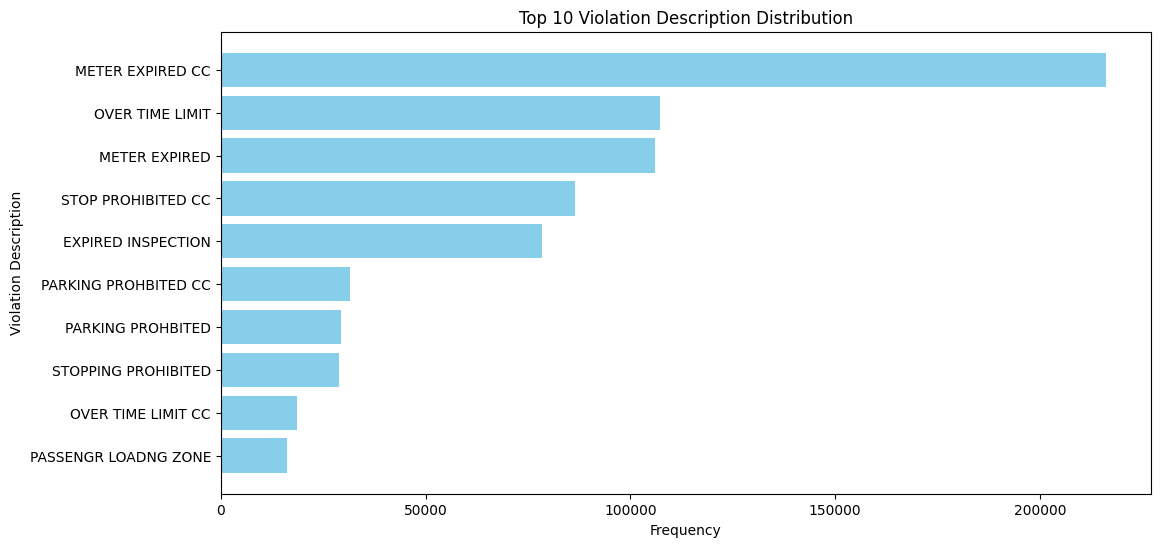

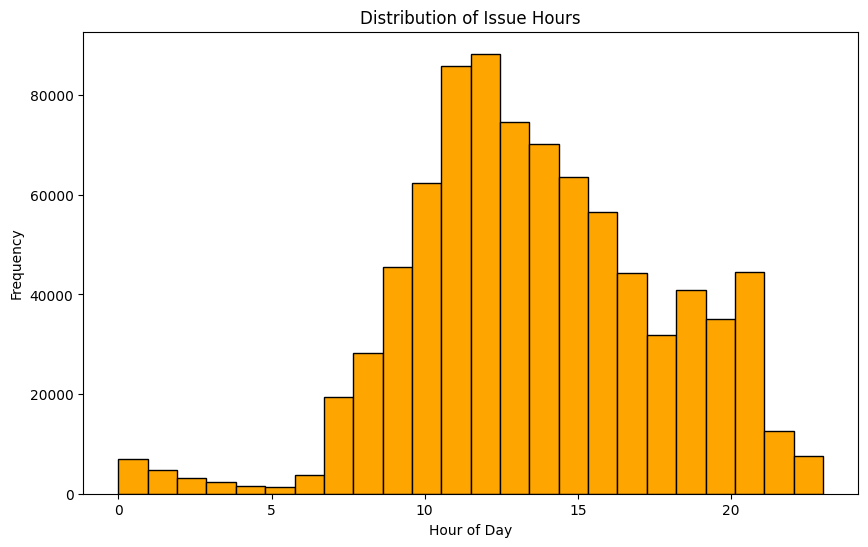

In [ ]:
# Plot updated correlation heatmap
plt.figure(figsize=(8, 6))
plt.imshow(correlation_matrix_filtered, cmap='coolwarm', interpolation='nearest')
plt.colorbar()
plt.xticks(range(len(numeric_features)), numeric_features, rotation=45)
plt.yticks(range(len(numeric_features)), numeric_features)
plt.title("Updated Correlation Heatmap (Excluding lat/lon)")
plt.show()

# Violation Description Distribution (Top 10)
top_violations = data_filtered['violation_desc'].value_counts().head(10)
plt.figure(figsize=(12, 6))
plt.barh(top_violations.index, top_violations.values, color='skyblue')
plt.xlabel("Frequency")
plt.ylabel("Violation Description")
plt.title("Top 10 Violation Description Distribution")
plt.gca().invert_yaxis()
plt.show()

# Distribution of Issue Hours
plt.figure(figsize=(10, 6))
plt.hist(data_filtered['issue_hour'], bins=24, color='orange', edgecolor='black')
plt.title("Distribution of Issue Hours")
plt.xlabel("Hour of Day")
plt.ylabel("Frequency")
plt.show()

In [21]:
data_filtered.describe()

print("\nMissing Values:\n", data_filtered.isnull().sum())



Missing Values:
 anon_ticket_number         0
issue_datetime             0
state                      0
anon_plate_id              0
division              835435
location                  58
violation_desc             0
fine                       0
issuing_agency             0
lat                        0
lon                        0
gps                        0
zip_code              111979
issue_hour                 0
issue_day                  0
dtype: int64


In [22]:
# Drop the 'zip_code' and 'division' columns
data_filtered = data_filtered.drop(columns=['zip_code', 'division'])

# Remove rows with any remaining missing values
data_filtered = data_filtered.dropna()

# Summary after dropping columns and removing rows with missing values
cleaned_summary = data_filtered.describe()
missing_values_summary = data_filtered.isnull().sum()

# Display cleaned summary and missing values information
cleaned_summary, missing_values_summary


(       anon_ticket_number                 issue_datetime  anon_plate_id  \
 count        8.354560e+05                         835456   8.354560e+05   
 mean         8.980086e+06  2017-09-30 04:20:18.600189440   3.146275e+06   
 min          8.539521e+06            2017-07-01 00:00:00   2.390000e+02   
 25%          8.759979e+06            2017-08-17 15:51:00   1.657968e+06   
 50%          8.978580e+06            2017-09-29 21:13:00   2.524654e+06   
 75%          9.198992e+06            2017-11-11 09:09:00   4.730703e+06   
 max          4.838229e+08            2017-12-31 15:42:00   4.884418e+06   
 std          7.747546e+05                            NaN   1.636268e+06   
 
                 fine            lat            lon     issue_hour  \
 count  835456.000000  835456.000000  835456.000000  835456.000000   
 mean       46.052307      39.964643     -75.164667      13.714068   
 min        26.000000      39.570733     -75.986927       0.000000   
 25%        26.000000      39.9469

/var/folders/tp/tl1z_f1545g5kt9cssf_36l80000gn/T/ipykernel_14880/2516929484.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['issue_datetime'] = pd.to_datetime(data_cleaned['issue_datetime'], errors='coerce')
/var/folders/tp/tl1z_f1545g5kt9cssf_36l80000gn/T/ipykernel_14880/2516929484.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_cleaned['issue_hour'] = data_cleaned['issue_datetime'].dt.hour


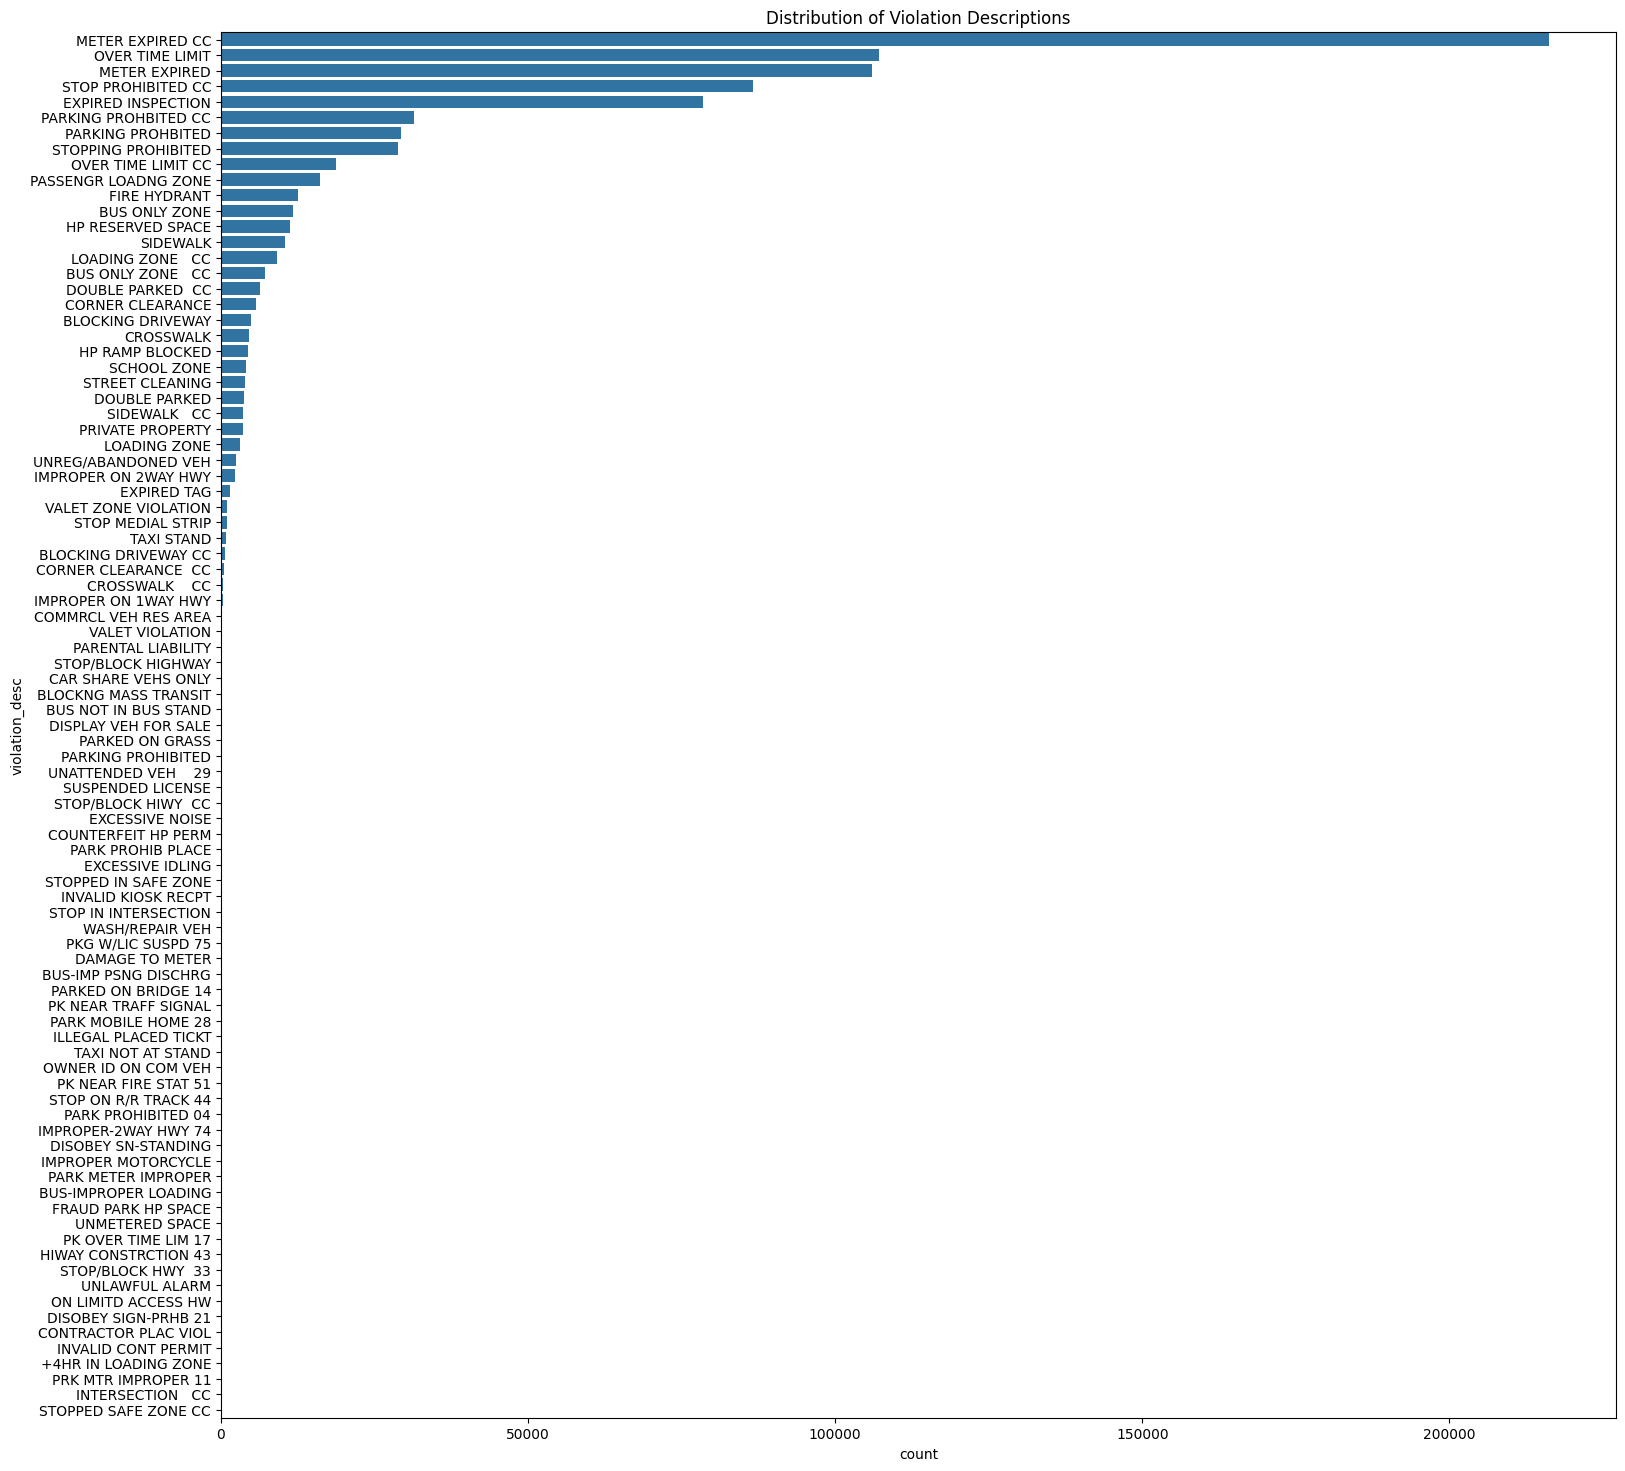

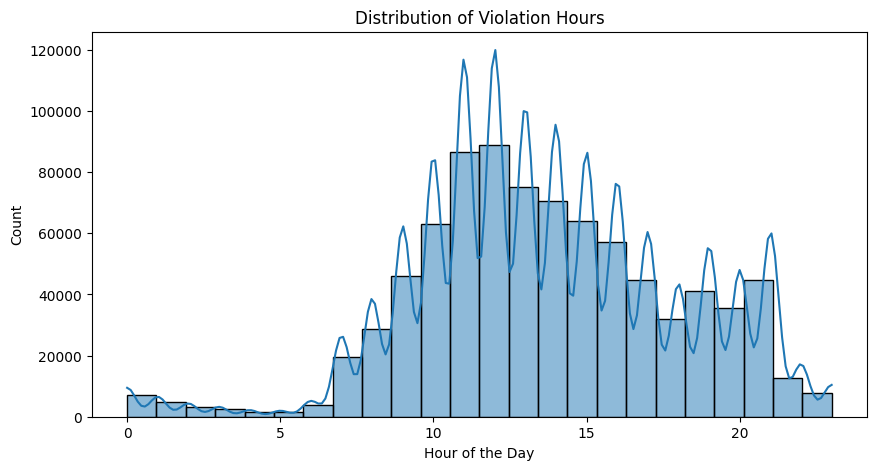

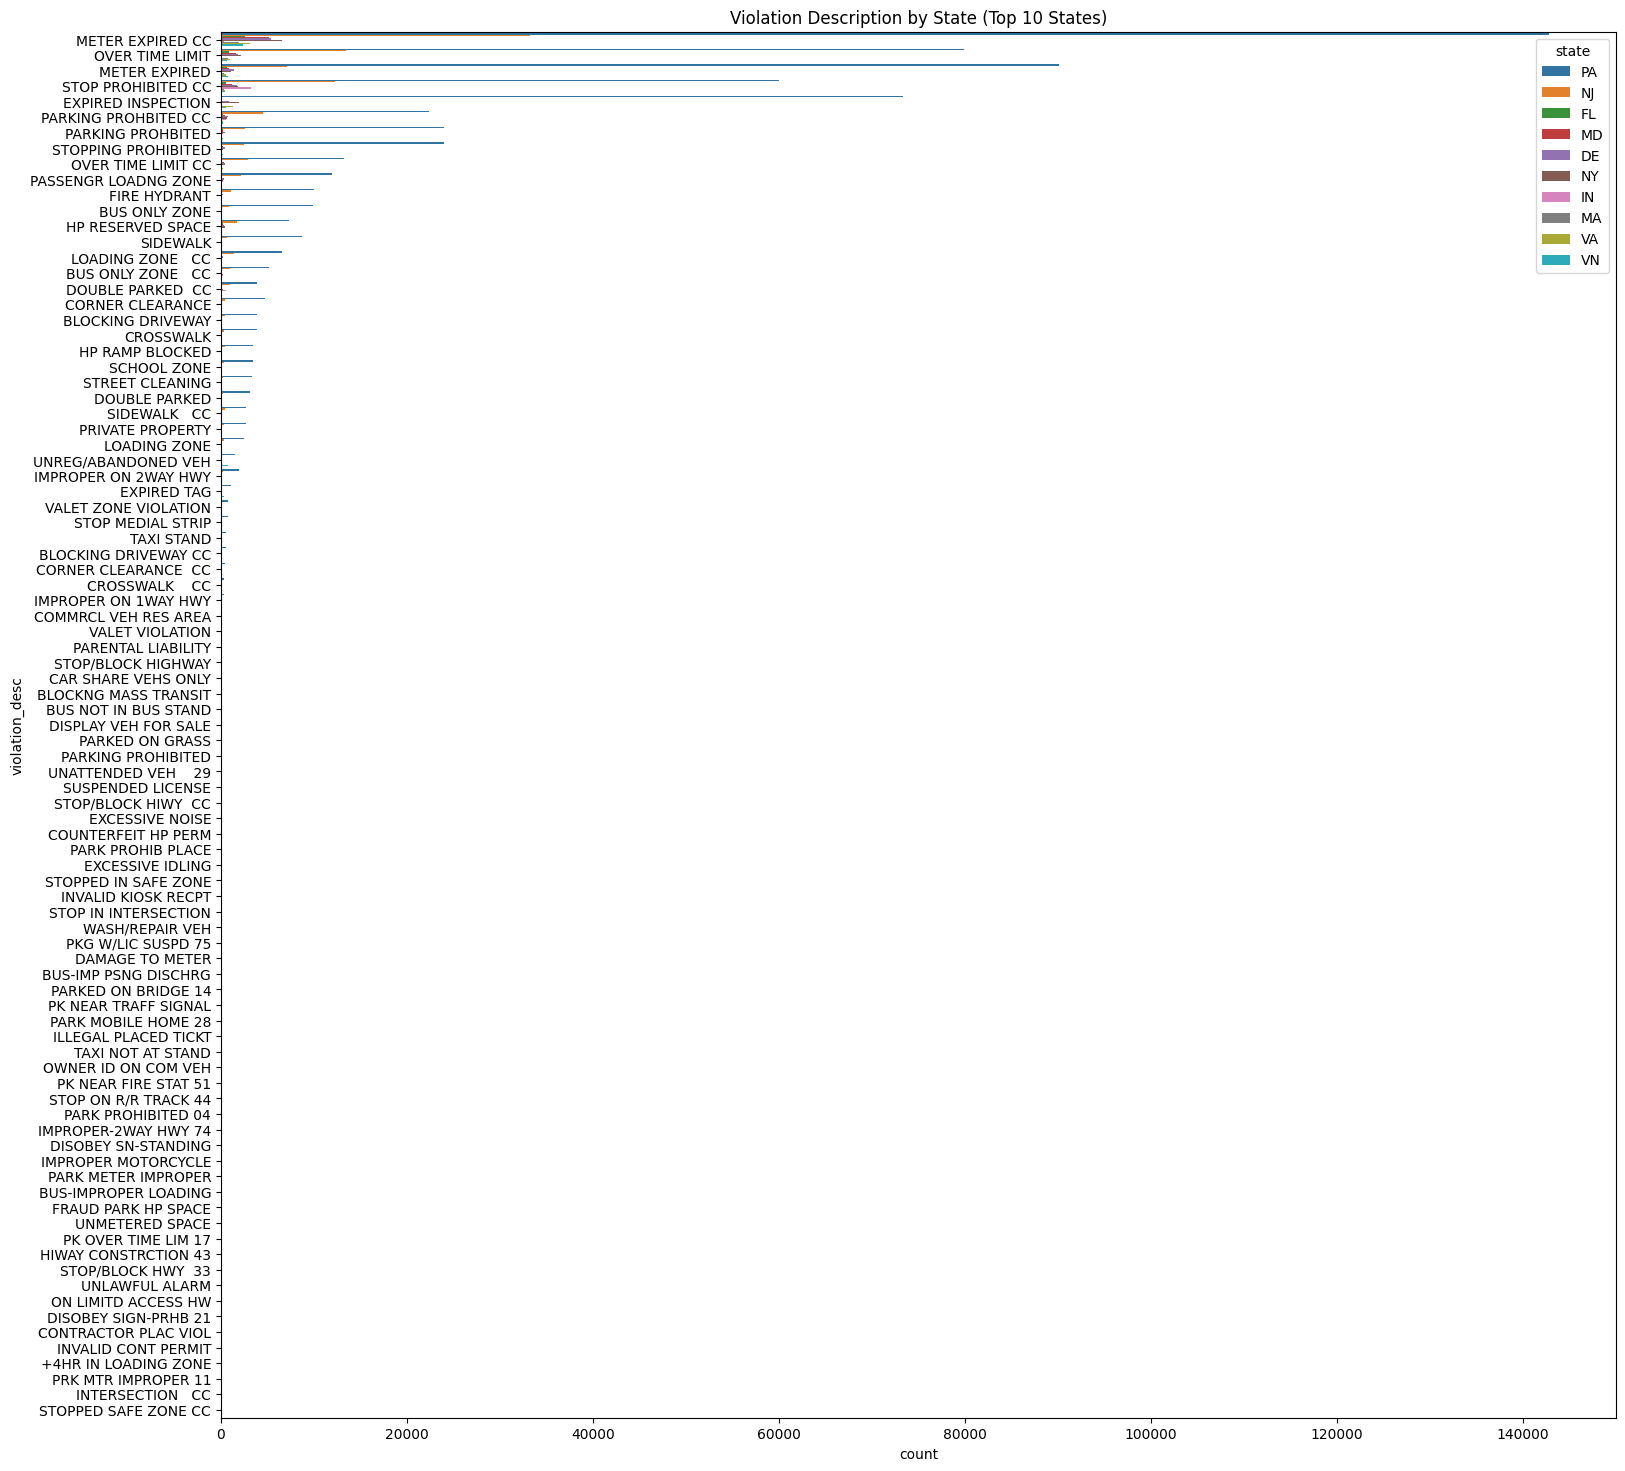

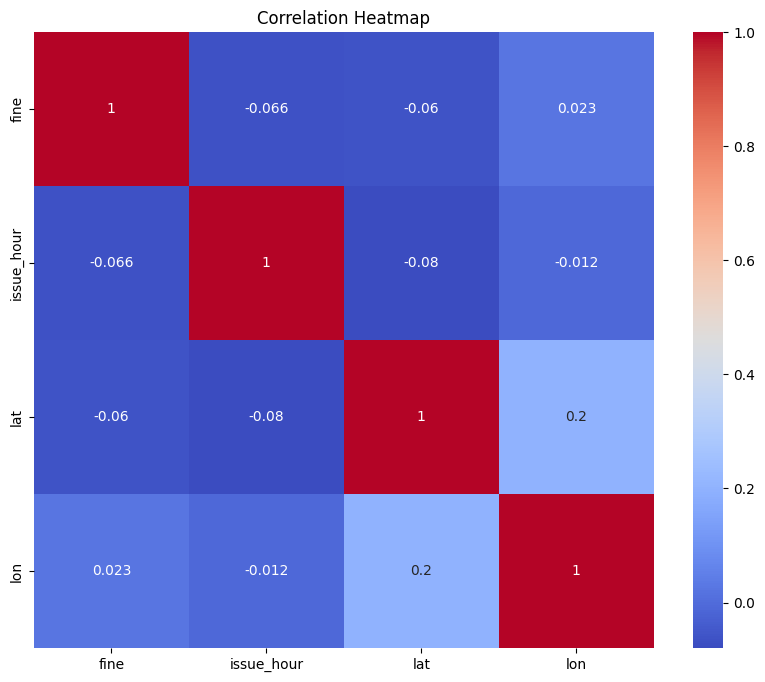

In [33]:
critical_features = ['violation_desc', 'state', 'issue_datetime', 'lat', 'lon']
data_cleaned = data.dropna(subset=critical_features)

# Step 3: Extract meaningful features
# Convert 'issue_datetime' to datetime and extract hour
data_cleaned['issue_datetime'] = pd.to_datetime(data_cleaned['issue_datetime'], errors='coerce')
data_cleaned['issue_hour'] = data_cleaned['issue_datetime'].dt.hour

# Step 4: Encode categorical variables for EDA
eda_data = data_cleaned.copy()
eda_data['violation_desc'] = eda_data['violation_desc'].astype(str)

# Step 5: Exploratory Data Analysis (EDA)
# Distribution of Violation Descriptions
plt.figure(figsize=(18, 18))
sns.countplot(data=eda_data, y='violation_desc', order=eda_data['violation_desc'].value_counts().index)
plt.title("Distribution of Violation Descriptions")
plt.show()

# Distribution of Violation Hours
plt.figure(figsize=(10, 5))
sns.histplot(eda_data['issue_hour'], bins=24, kde=True)
plt.title("Distribution of Violation Hours")
plt.xlabel("Hour of the Day")
plt.ylabel("Count")
plt.show()

# Bivariate Analysis: Violation Description by State
top_states = eda_data['state'].value_counts().head(10).index
plt.figure(figsize=(18, 18))
sns.countplot(data=eda_data[eda_data['state'].isin(top_states)], y='violation_desc', hue='state', 
              order=eda_data['violation_desc'].value_counts().index)
plt.title("Violation Description by State (Top 10 States)")
plt.show()

# Correlation Heatmap for Numeric Features
numeric_features = ['fine', 'issue_hour', 'lat', 'lon']  # Include other numeric features if needed
plt.figure(figsize=(10, 8))
sns.heatmap(data_cleaned[numeric_features].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


/var/folders/tp/tl1z_f1545g5kt9cssf_36l80000gn/T/ipykernel_14880/732559918.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=filtered_data, x='violation_desc', y='hour', palette='viridis')


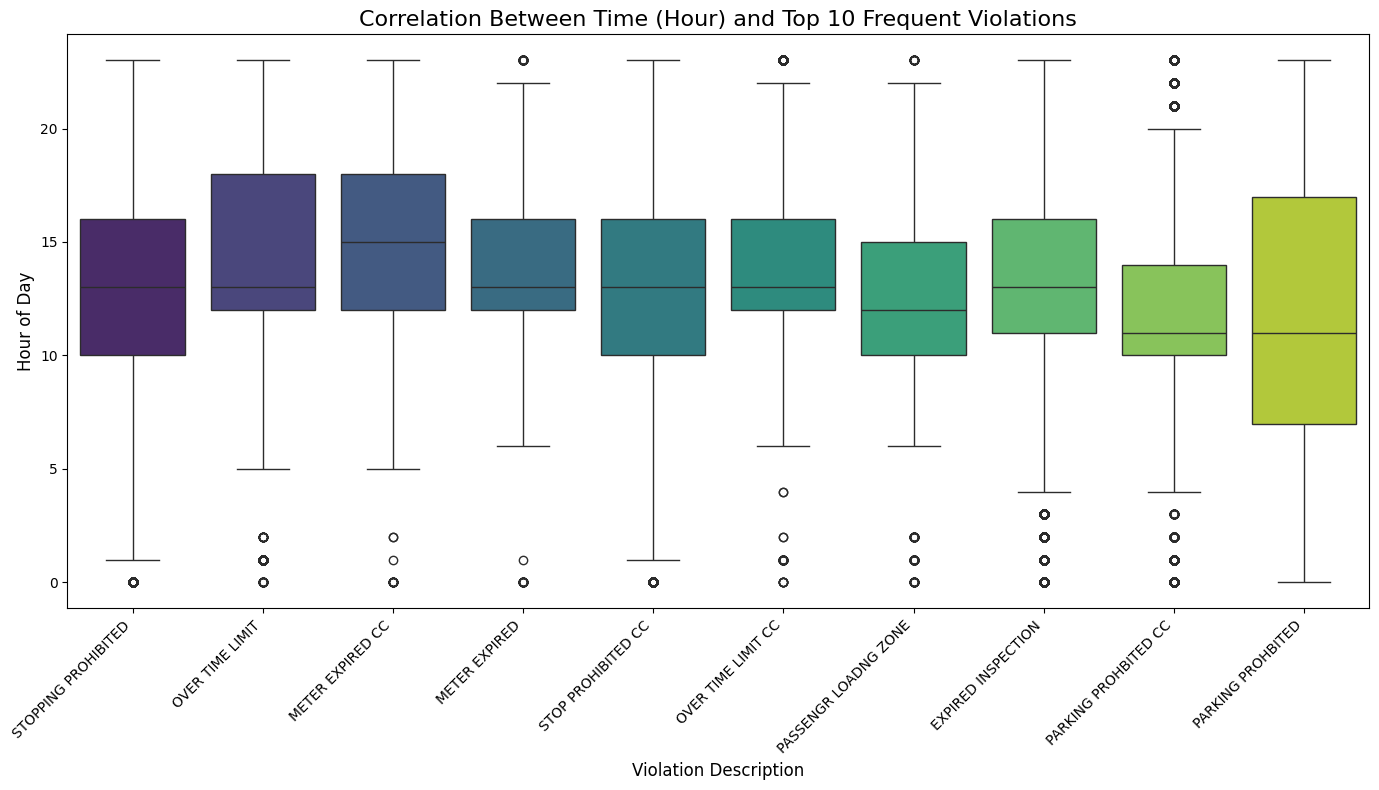

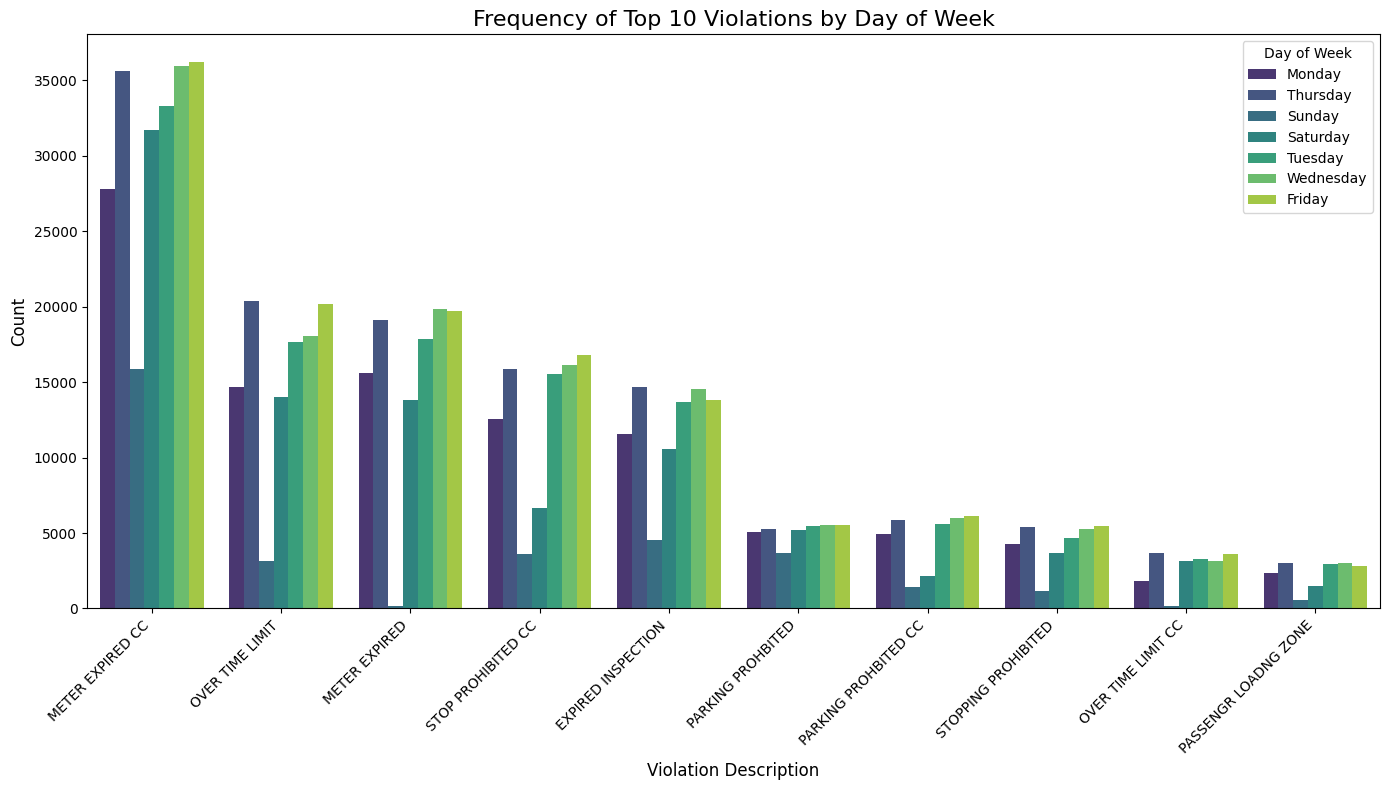

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns

# Convert issue_datetime to datetime for analysis
data['issue_datetime'] = pd.to_datetime(data['issue_datetime'])

# Extract date and time components
data['hour'] = data['issue_datetime'].dt.hour
data['day_of_week'] = data['issue_datetime'].dt.day_name()
data['month'] = data['issue_datetime'].dt.month

# Find the top 10 most frequent violation descriptions
top_violations = data['violation_desc'].value_counts().head(10).index

# Filter data for the top 10 violations
filtered_data = data[data['violation_desc'].isin(top_violations)]

# Plotting correlation between time (hour) and top violations
plt.figure(figsize=(14, 8))
sns.boxplot(data=filtered_data, x='violation_desc', y='hour', palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.title('Correlation Between Time (Hour) and Top 10 Frequent Violations', fontsize=16)
plt.xlabel('Violation Description', fontsize=12)
plt.ylabel('Hour of Day', fontsize=12)
plt.tight_layout()
plt.show()

# Plotting day of week vs. top violations
plt.figure(figsize=(14, 8))
sns.countplot(data=filtered_data, x='violation_desc', hue='day_of_week', palette='viridis', order=top_violations)
plt.xticks(rotation=45, ha='right')
plt.title('Frequency of Top 10 Violations by Day of Week', fontsize=16)
plt.xlabel('Violation Description', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.legend(title='Day of Week')
plt.tight_layout()
plt.show()


# Random Forrest

Classification Report:

                      precision    recall  f1-score   support

   BLOCKING DRIVEWAY       0.43      0.32      0.37       961
       BUS ONLY ZONE       0.69      0.68      0.68      2453
  BUS ONLY ZONE   CC       0.61      0.38      0.47      1465
    CORNER CLEARANCE       0.51      0.37      0.43      1216
           CROSSWALK       0.46      0.38      0.41       899
       DOUBLE PARKED       0.49      0.36      0.42       793
   DOUBLE PARKED  CC       0.52      0.24      0.33      1323
  EXPIRED INSPECTION       0.91      0.94      0.93     15483
         EXPIRED TAG       0.40      0.21      0.27       311
        FIRE HYDRANT       0.83      0.80      0.82      2568
     HP RAMP BLOCKED       0.68      0.58      0.62       833
   HP RESERVED SPACE       0.96      0.98      0.97      2275
IMPROPER ON 2WAY HWY       0.82      0.74      0.78       459
        LOADING ZONE       0.83      0.83      0.83       659
   LOADING ZONE   CC       0.77      0.63    

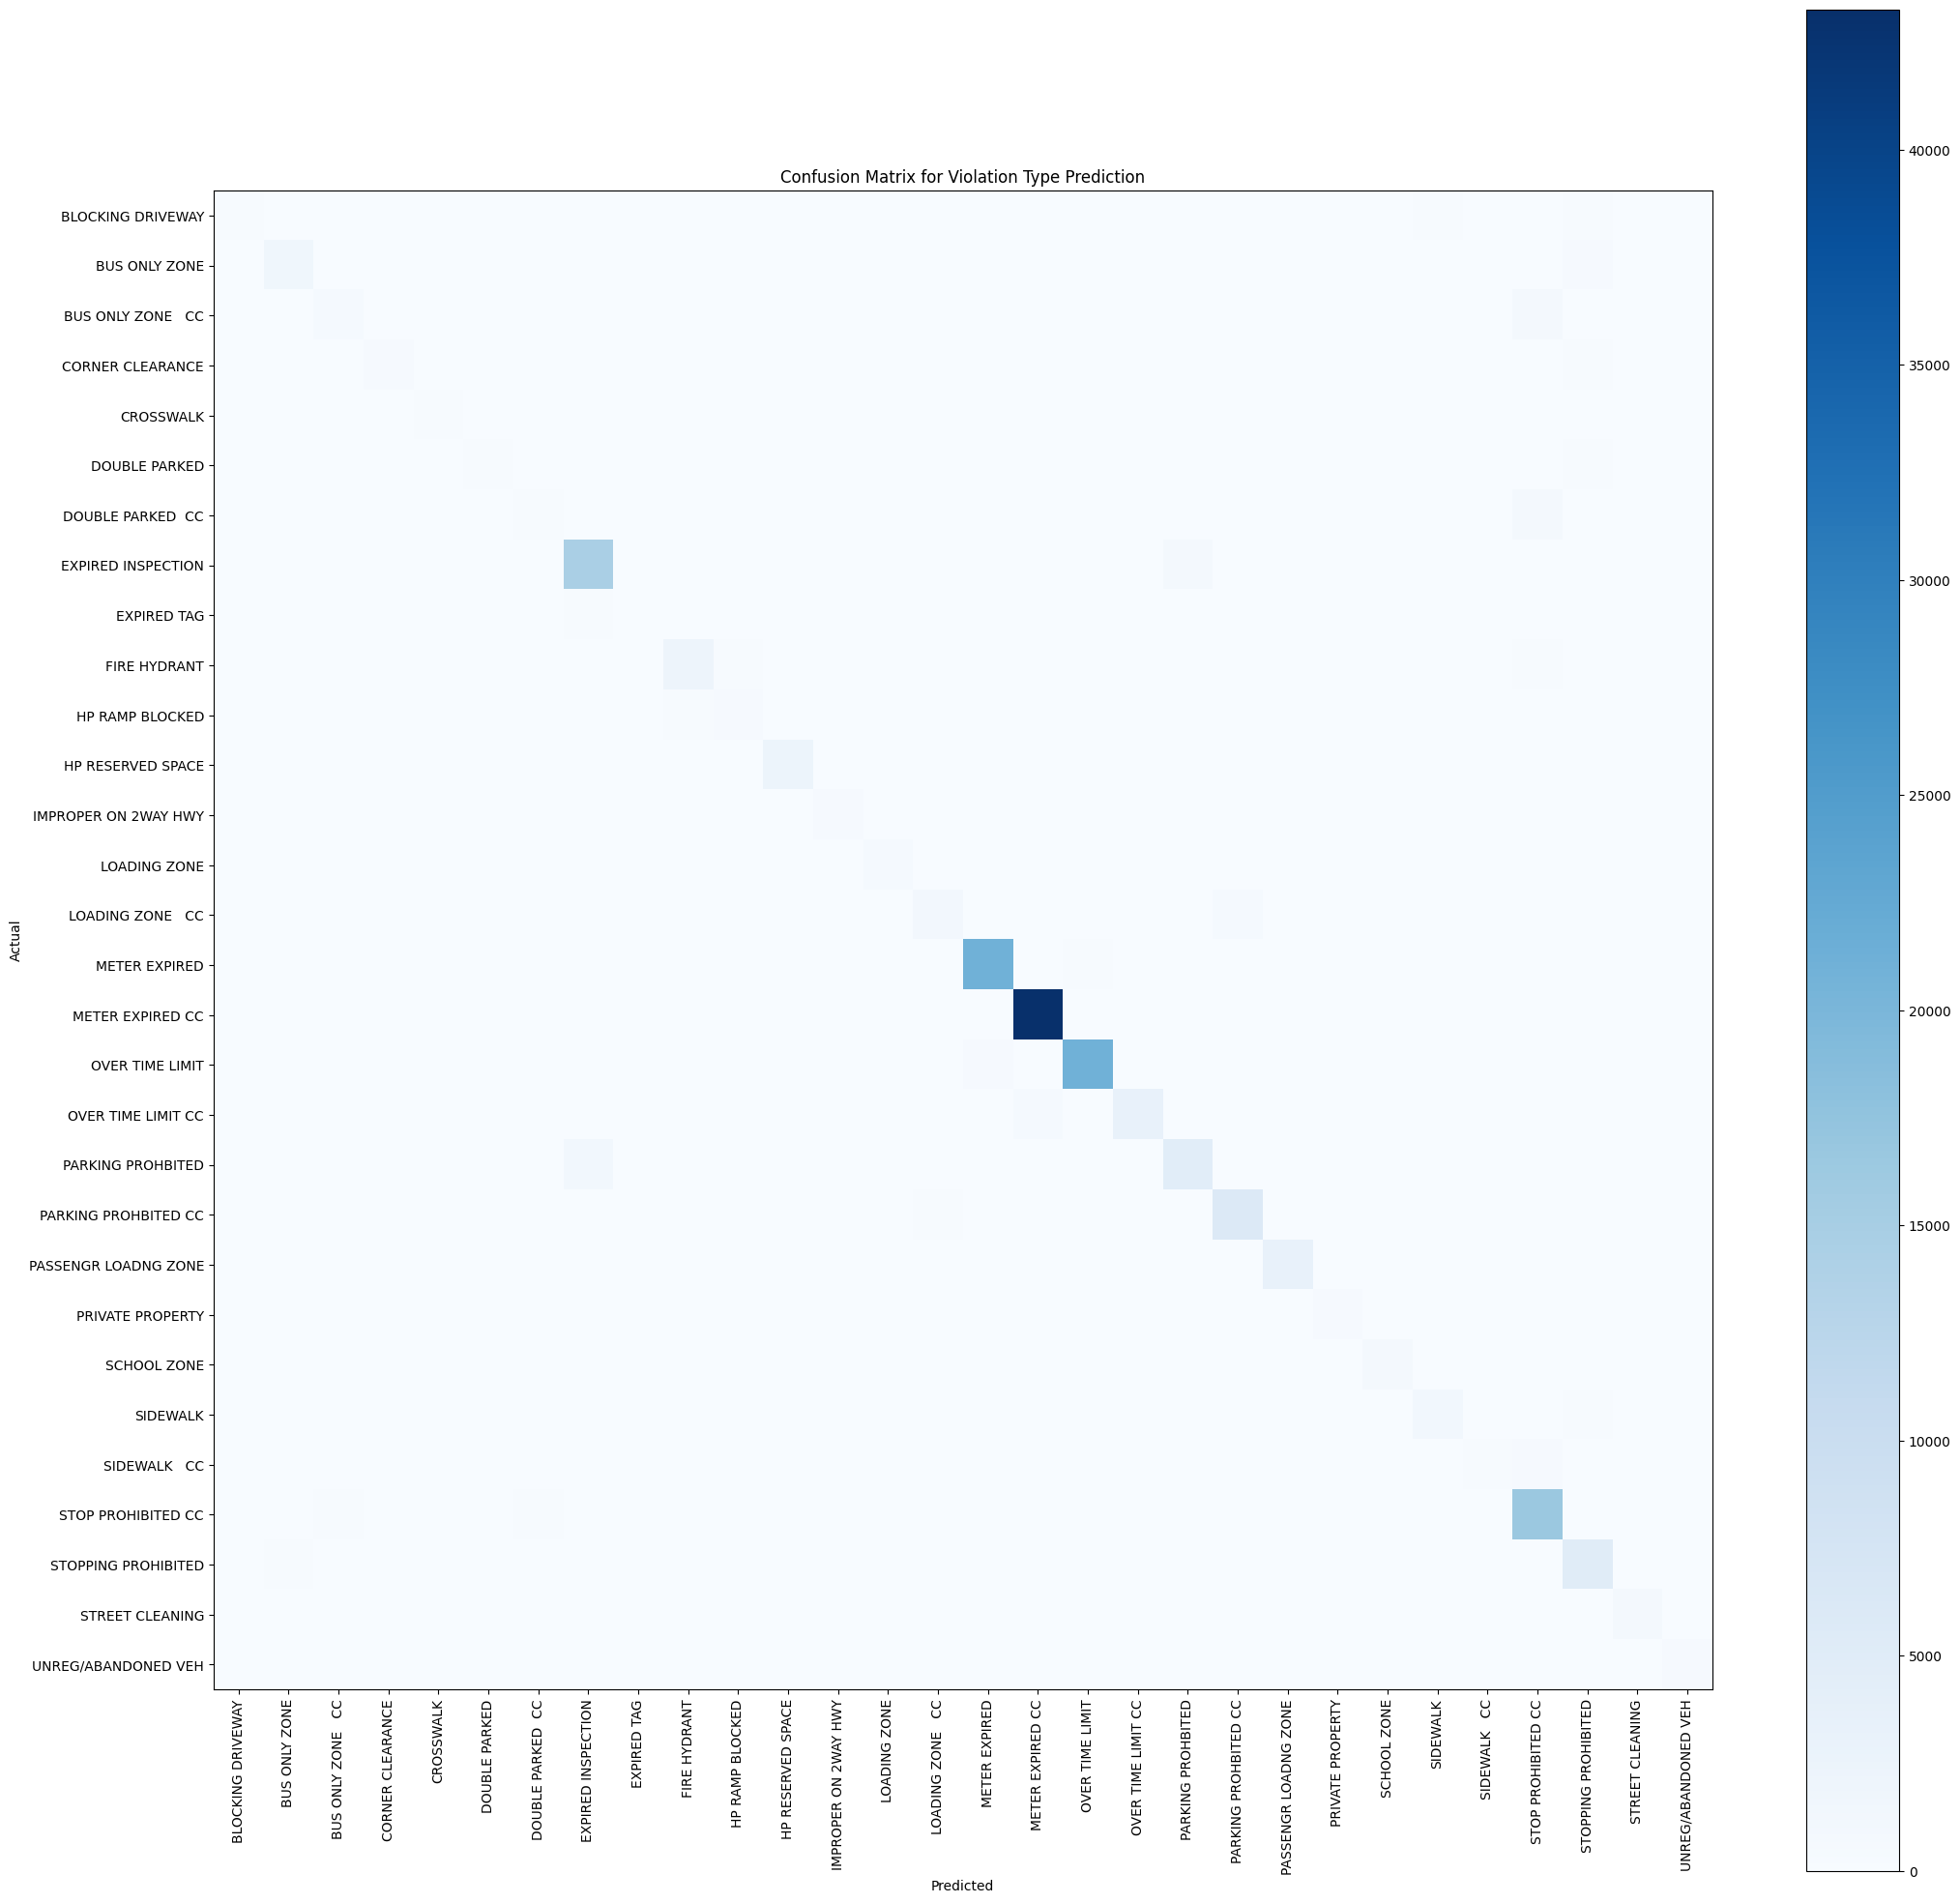

In [23]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Select relevant features and the target
features = ['state', 'fine', 'issue_hour', 'lat', 'lon']  # Relevant features
target = 'violation_desc'  # Target column

# Encode categorical variables
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_states = encoder.fit_transform(data_filtered[['state']])
encoded_states_df = pd.DataFrame(encoded_states, columns=encoder.get_feature_names_out(['state']))

# Combine encoded states with other features
X = pd.concat([data_filtered[features].reset_index(drop=True), encoded_states_df], axis=1).drop(columns=['state'])
y = data_filtered[target]

# Normalize numeric features
scaler = StandardScaler()
X[['fine', 'issue_hour', 'lat', 'lon']] = scaler.fit_transform(X[['fine', 'issue_hour', 'lat', 'lon']])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Predictions on Test Data
y_pred = rf_clf.predict(X_test)

# Classification Report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

# Confusion Matrix
plt.figure(figsize=(25, 25))
cm = confusion_matrix(y_test, y_pred, labels=rf_clf.classes_)
plt.imshow(cm, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title("Confusion Matrix for Violation Type Prediction")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(ticks=range(len(rf_clf.classes_)), labels=rf_clf.classes_, rotation=90)
plt.yticks(ticks=range(len(rf_clf.classes_)), labels=rf_clf.classes_)
plt.show()


# Data Splitting

In [38]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler

# Drop unnecessary columns
data_cleaned = data.drop(columns=['division', 'zip_code'])

# Handle missing values: Drop rows with missing critical features
critical_features = ['violation_desc', 'state', 'issue_datetime', 'lat', 'lon']
data_cleaned = data_cleaned.dropna(subset=critical_features)

# Convert 'issue_datetime' to datetime and extract useful features
data_cleaned['issue_datetime'] = pd.to_datetime(data_cleaned['issue_datetime'], errors='coerce')
data_cleaned['issue_hour'] = data_cleaned['issue_datetime'].dt.hour  # Extract hour
data_cleaned['issue_day'] = data_cleaned['issue_datetime'].dt.dayofweek  # Extract day of the week

# Drop rows with invalid datetime conversions
data_cleaned = data_cleaned.dropna(subset=['issue_datetime'])

# Encode categorical variables
# Encode categorical variables
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_states = encoder.fit_transform(data_cleaned[['state']])
encoded_states_df = pd.DataFrame(encoded_states, columns=encoder.get_feature_names_out(['state']))
# Combine encoded states with other features
features = ['fine', 'issue_hour', 'lat', 'lon']  # Numerical features
X = pd.concat([data_cleaned[features].reset_index(drop=True), encoded_states_df], axis=1)
y = data_cleaned['violation_desc']

# Normalize numerical features
scaler = StandardScaler()
X[features] = scaler.fit_transform(X[features])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check data readiness
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((673720, 77), (168431, 77), (673720,), (168431,))

# KNN

Classification Report for k-NN:



/Users/yashdode/Library/Python/3.12/lib/python/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yashdode/Library/Python/3.12/lib/python/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/yashdode/Library/Python/3.12/lib/python/site-packages/sklearn/metrics/_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(res

                      precision    recall  f1-score   support

   BLOCKING DRIVEWAY       0.28      0.24      0.26       985
BLOCKING DRIVEWAY CC       0.35      0.32      0.34       144
BLOCKNG MASS TRANSIT       0.41      0.28      0.33        25
BUS NOT IN BUS STAND       1.00      0.75      0.86        20
       BUS ONLY ZONE       0.51      0.58      0.54      2280
  BUS ONLY ZONE   CC       0.49      0.38      0.43      1489
BUS-IMP PSNG DISCHRG       0.00      0.00      0.00         1
 CAR SHARE VEHS ONLY       0.64      0.29      0.40        24
COMMRCL VEH RES AREA       0.78      0.38      0.51        48
    CORNER CLEARANCE       0.34      0.28      0.31      1148
CORNER CLEARANCE  CC       0.24      0.13      0.17       113
 COUNTERFEIT HP PERM       0.80      1.00      0.89         4
           CROSSWALK       0.35      0.25      0.29       928
     CROSSWALK    CC       0.30      0.13      0.18        78
     DAMAGE TO METER       0.00      0.00      0.00         0
DISPLAY

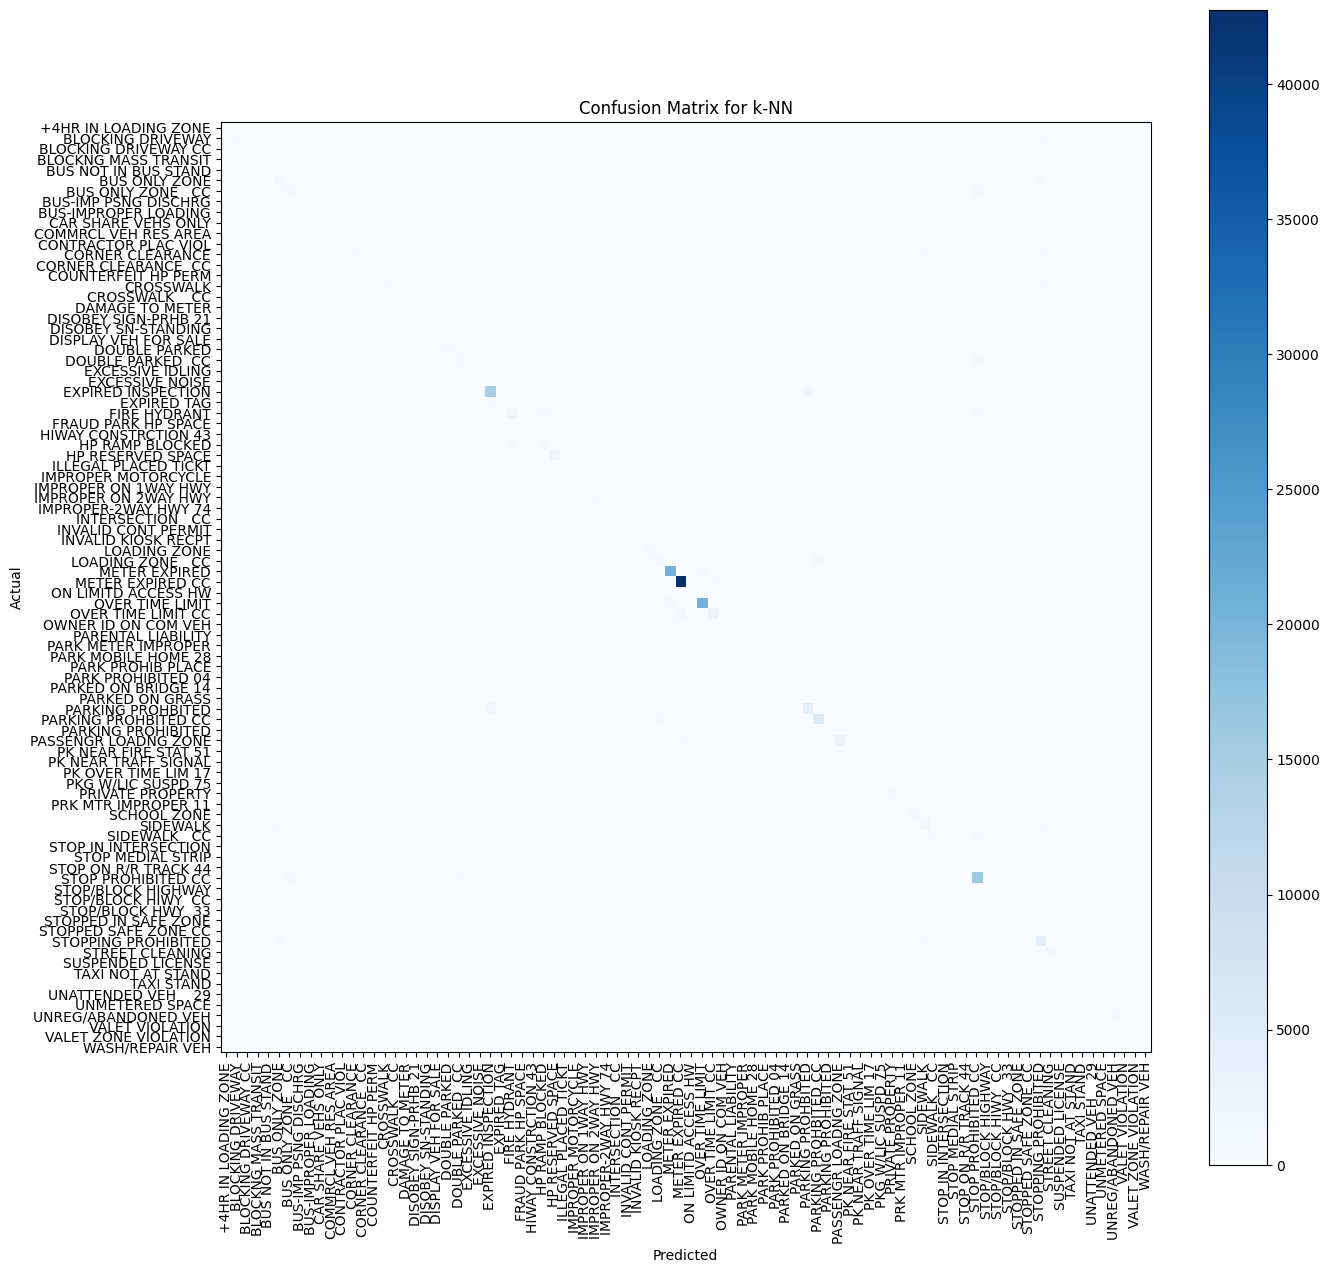

In [27]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Initialize k-NN classifier with k=5
knn_clf = KNeighborsClassifier(n_neighbors=5)

# Train the k-NN classifier
knn_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_clf.predict(X_test)

# Evaluate the model
print("Classification Report for k-NN:\n")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
plt.figure(figsize=(15, 15))
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=knn_clf.classes_)
plt.imshow(cm_knn, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title("Confusion Matrix for k-NN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(ticks=range(len(knn_clf.classes_)), labels=knn_clf.classes_, rotation=90)
plt.yticks(ticks=range(len(knn_clf.classes_)), labels=knn_clf.classes_)
plt.show()


In [28]:
# Filter out violation descriptions with a frequency less than "EXPIRED TAG"
violation_counts = data_cleaned['violation_desc'].value_counts()
expired_tag_threshold = violation_counts.get('EXPIRED TAG', 0)

# Filter the dataset to include only descriptions meeting or exceeding the threshold
data_filtered = data_cleaned[data_cleaned['violation_desc'].isin(violation_counts[violation_counts >= expired_tag_threshold].index)]

# Encode categorical variables
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_states = encoder.fit_transform(data_filtered[['state']])
encoded_states_df = pd.DataFrame(encoded_states, columns=encoder.get_feature_names_out(['state']))

# Combine encoded states with other features
features = ['fine', 'issue_hour', 'lat', 'lon']  # Numerical features
X_filtered = pd.concat([data_filtered[features].reset_index(drop=True), encoded_states_df], axis=1)
y_filtered = data_filtered['violation_desc']

# Normalize numerical features
scaler = StandardScaler()
X_filtered[features] = scaler.fit_transform(X_filtered[features])

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X_filtered, y_filtered, test_size=0.2, random_state=42)

# Check filtered data readiness
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((668411, 77), (167103, 77), (668411,), (167103,))

Classification Report for k-NN:

                      precision    recall  f1-score   support

   BLOCKING DRIVEWAY       0.29      0.26      0.27       970
       BUS ONLY ZONE       0.51      0.57      0.54      2372
  BUS ONLY ZONE   CC       0.48      0.38      0.43      1423
    CORNER CLEARANCE       0.34      0.28      0.31      1131
           CROSSWALK       0.36      0.27      0.31       873
       DOUBLE PARKED       0.39      0.29      0.33       735
   DOUBLE PARKED  CC       0.42      0.25      0.31      1281
  EXPIRED INSPECTION       0.89      0.92      0.90     15574
         EXPIRED TAG       0.48      0.16      0.24       299
        FIRE HYDRANT       0.78      0.70      0.74      2469
     HP RAMP BLOCKED       0.64      0.48      0.55       888
   HP RESERVED SPACE       0.95      0.97      0.96      2251
IMPROPER ON 2WAY HWY       0.64      0.41      0.50       492
        LOADING ZONE       0.78      0.58      0.67       612
   LOADING ZONE   CC       0.65     

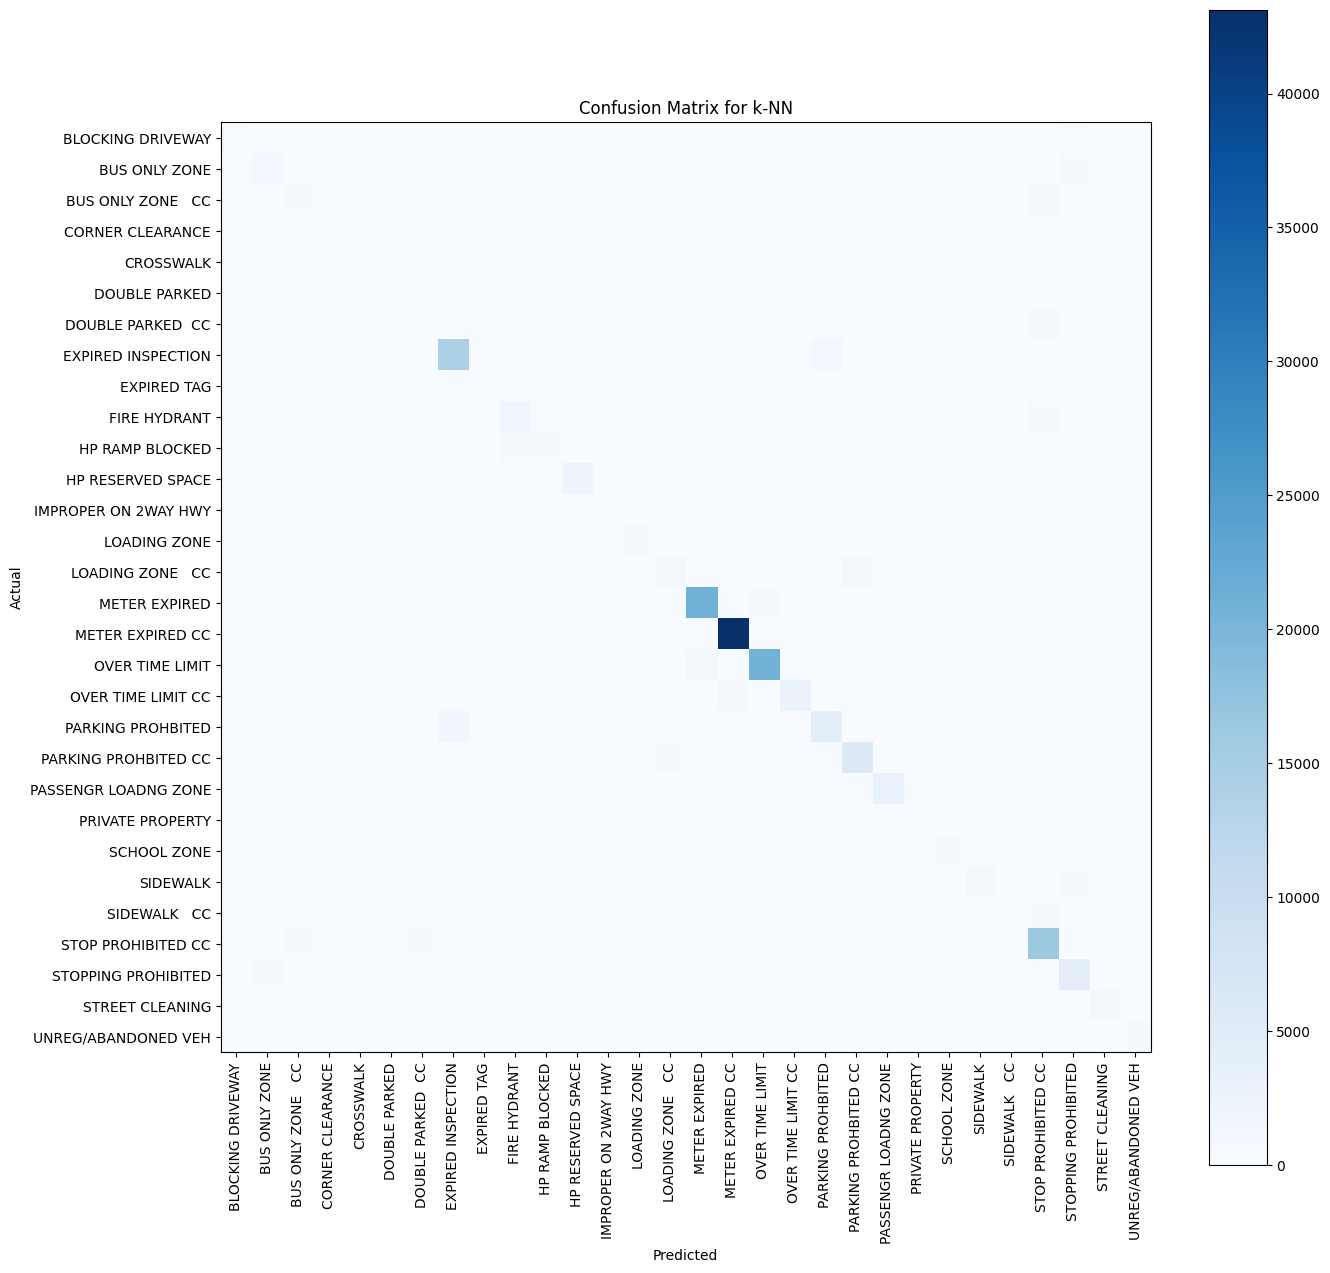

In [29]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Initialize k-NN classifier with k=5
knn_clf = KNeighborsClassifier(n_neighbors=5)

# Train the k-NN classifier
knn_clf.fit(X_train, y_train)

# Predict on the test set
y_pred_knn = knn_clf.predict(X_test)

# Evaluate the model
print("Classification Report for k-NN:\n")
print(classification_report(y_test, y_pred_knn))

# Confusion Matrix
plt.figure(figsize=(15, 15))
cm_knn = confusion_matrix(y_test, y_pred_knn, labels=knn_clf.classes_)
plt.imshow(cm_knn, cmap='Blues', interpolation='nearest')
plt.colorbar()
plt.title("Confusion Matrix for k-NN")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks(ticks=range(len(knn_clf.classes_)), labels=knn_clf.classes_, rotation=90)
plt.yticks(ticks=range(len(knn_clf.classes_)), labels=knn_clf.classes_)
plt.show()


# GEO CLUSTERING WITH HBSCAN

In [5]:
import pandas as pd
import numpy as np
geo_data = data.dropna(subset=['lat', 'lon'])

# Step 2: Prepare only geographical features
coordinates = geo_data[['lat', 'lon']].values

# Step 3: Convert coordinates to radians for geographical distance metrics
coordinates_radians = np.radians(coordinates)

# Step 4: Clean dataset for clustering analysis
geo_data_cleaned = geo_data[['lat', 'lon']].dropna().reset_index(drop=True)

# Confirm readiness of the data
geo_data_cleaned.info(), coordinates_radians[:5]  # Display the data structure and sample coordinates


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 842152 entries, 0 to 842151
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   lat     842152 non-null  float64
 1   lon     842152 non-null  float64
dtypes: float64(2)
memory usage: 12.9 MB


(None,
 array([[ 0.69875135, -1.31041258],
        [ 0.69858046, -1.31288021],
        [ 0.69858186, -1.31288129],
        [ 0.69858371, -1.31288393],
        [ 0.69736486, -1.31174365]]))

In [7]:
geo_data_cleaned.isnull().sum()

lat    0
lon    0
dtype: int64

In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Step 5: Perform DBSCAN clustering
# Parameters: eps (distance threshold), min_samples (minimum points to form a cluster)
dbscan = DBSCAN(eps=0.01, min_samples=50, metric='haversine')
geo_data_cleaned['cluster'] = dbscan.fit_predict(coordinates_radians)

# Step 6: Visualize the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    geo_data_cleaned['lon'],
    geo_data_cleaned['lat'],
    c=geo_data_cleaned['cluster'],
    cmap='tab20',
    s=5,
    alpha=0.6
)
plt.colorbar(scatter, label='Cluster Label')
plt.title('Geographical Clusters Using DBSCAN')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Summary of clusters
geo_data_cleaned['cluster'].value_counts()


In [4]:
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'newset.csv'  # Replace with your actual file path
data = pd.read_csv(file_path)

# Data preprocessing for DBSCAN clustering
geo_data = data.dropna(subset=['lat', 'lon'])  # Drop rows with missing lat/lon
geo_data_cleaned = geo_data[['lat', 'lon']].reset_index(drop=True)  # Keep only lat/lon

# Sample the dataset (10% of the rows for clustering)
geo_data_sampled = geo_data_cleaned.sample(frac=0.1, random_state=42).reset_index(drop=True)

# Prepare coordinates in radians for the sampled data
coordinates_sampled_radians = np.radians(geo_data_sampled[['lat', 'lon']].values)
coordinates_sampled_radians

array([[ 0.69689142, -1.3130268 ],
       [ 0.69727479, -1.31242274],
       [ 0.69712721, -1.311683  ],
       ...,
       [ 0.69726527, -1.31197481],
       [ 0.69731728, -1.31170539],
       [ 0.69731646, -1.31241836]])

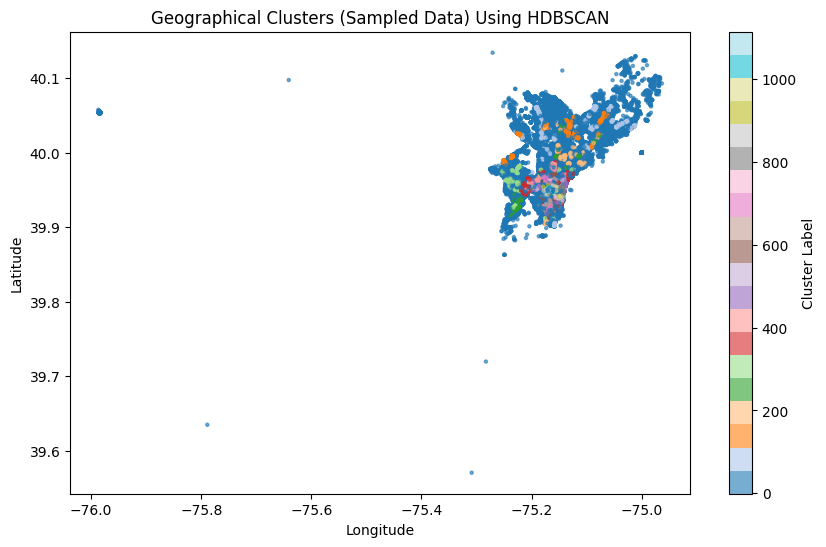

Cluster Distribution:
cluster
-1      160257
 827      3158
 814      3109
 1        2360
 119      2083
         ...  
 91         50
 364        50
 242        50
 776        50
 727        50
Name: count, Length: 1116, dtype: int64


In [34]:
import pandas as pd
import numpy as np
from hdbscan import HDBSCAN
import matplotlib.pyplot as plt

# Load the dataset
file_path = 'newset.csv'  # Replace with your dataset path
data = pd.read_csv(file_path)

# Data preprocessing
geo_data = data.dropna(subset=['lat', 'lon'])  # Drop rows with missing lat/lon
geo_data_cleaned = geo_data[['lat', 'lon']].reset_index(drop=True)

# Downsample the dataset to 5%
geo_data_sampled = geo_data_cleaned.sample(frac=0.5, random_state=42).reset_index(drop=True)

# Reduce precision to save memory
geo_data_sampled = geo_data_sampled.astype({'lat': 'float32', 'lon': 'float32'})

# Convert coordinates to radians for haversine metric
coordinates_sampled_radians = np.radians(geo_data_sampled[['lat', 'lon']].values)

# Perform HDBSCAN clustering
hdbscan = HDBSCAN(min_cluster_size=50, metric='haversine')
geo_data_sampled['cluster'] = hdbscan.fit_predict(coordinates_sampled_radians)

# Visualize the clusters
plt.figure(figsize=(10, 6))
scatter = plt.scatter(
    geo_data_sampled['lon'],
    geo_data_sampled['lat'],
    c=geo_data_sampled['cluster'],
    cmap='tab20',
    s=5,
    alpha=0.6
)
plt.colorbar(scatter, label='Cluster Label')
plt.title('Geographical Clusters (Sampled Data) Using HDBSCAN')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

# Summary of clusters
print("Cluster Distribution:")
print(geo_data_sampled['cluster'].value_counts())


In [12]:
!pip install folium

Defaulting to user installation because normal site-packages is not writeable


In [9]:
# Reset index for the original data to ensure alignment
geo_data_reset = geo_data.reset_index(drop=True)

# Add the cluster labels to the original dataset using the sampled data indices
geo_data_reset.loc[geo_data_sampled.index, 'cluster'] = geo_data_sampled['cluster']

# Analyze violation patterns by cluster
violation_patterns = geo_data_reset.groupby('cluster')['violation_desc'].value_counts(normalize=True).unstack(fill_value=0)

# Display the top violations per cluster
top_violations_per_cluster = violation_patterns.apply(lambda x: x.idxmax(), axis=1)
top_violations_counts = violation_patterns.apply(lambda x: x.max(), axis=1)

# Combine cluster labels, top violations, and their relative frequencies
cluster_analysis = pd.DataFrame({
    'Cluster': top_violations_per_cluster.index,
    'Top Violation': top_violations_per_cluster.values,
    'Frequency': top_violations_counts.values
}).reset_index(drop=True)

# Show the results
cluster_analysis

,Cluster,Top Violation,Frequency
0,-1.0,METER EXPIRED CC,0.312641
1,0.0,METER EXPIRED CC,0.330645
2,1.0,METER EXPIRED CC,0.280374
3,2.0,METER EXPIRED CC,0.294187
4,3.0,METER EXPIRED CC,0.343243
...,...,...,...
71,70.0,METER EXPIRED CC,0.280899
72,71.0,METER EXPIRED CC,0.245902
73,72.0,METER EXPIRED CC,0.372881
74,73.0,METER EXPIRED CC,0.285714


In [18]:
import folium
from folium.plugins import MarkerCluster

# Ensure the violation_desc column is included during preprocessing
geo_data = data.dropna(subset=['lat', 'lon', 'violation_desc'])  # Keep violation_desc
geo_data_cleaned = geo_data[['lat', 'lon', 'violation_desc']].reset_index(drop=True)

# Sample the dataset (e.g., 10%)
geo_data_sampled = geo_data_cleaned.sample(frac=0.5, random_state=42).reset_index(drop=True)

# Perform clustering (if not done yet, include clustering code here)
# geo_data_sampled['cluster'] = ... # Add clustering labels if necessary

# Initialize a map centered on the mean latitude and longitude
center_lat = geo_data_sampled['lat'].mean()
center_lon = geo_data_sampled['lon'].mean()
cluster_map = folium.Map(location=[center_lat, center_lon], zoom_start=12)

# Add a marker cluster
marker_cluster = MarkerCluster().add_to(cluster_map)

# Add data points with cluster labels and violation descriptions as popups
for _, row in geo_data_sampled.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=f"Violation: {row['violation_desc']}"  # Add cluster information if available
    ).add_to(marker_cluster)

# Save the map as an HTML file
cluster_map.save("cluster_map2.html")
print("Map saved as 'cluster_map.html'. Open it in your browser.")


Map saved as 'cluster_map.html'. Open it in your browser.


Full dataset map saved as 'full_dataset_map.html'. Open it in your browser.


Map saved as 'cluster_map.html'. Open it in your browser.


In [30]:
geo_data_sampled = geo_data_cleaned[['lat', 'lon', 'violation_desc']].sample(frac=0.5, random_state=42)


In [31]:
clusterer = HDBSCAN(min_cluster_size=50, metric='haversine')
geo_data_sampled['cluster'] = clusterer.fit_predict(
    np.radians(geo_data_sampled[['lat', 'lon']])
)
cluster_analysis = geo_data_sampled.groupby('cluster')['violation_desc'].value_counts(normalize=True)
print(cluster_analysis)


cluster  violation_desc      
-1       METER EXPIRED CC        0.197871
         STOP PROHIBITED CC      0.129003
         OVER TIME LIMIT         0.116051
         EXPIRED INSPECTION      0.110744
         PARKING PROHBITED CC    0.050764
                                   ...   
 1098    SIDEWALK   CC           0.002105
         BUS NOT IN BUS STAND    0.001053
         COUNTERFEIT HP PERM     0.001053
         FIRE HYDRANT            0.001053
         PASSENGR LOADNG ZONE    0.001053
Name: proportion, Length: 9216, dtype: float64
